In [3]:
using GCoptimization
using PyPlot

using Distributions
using IterTools

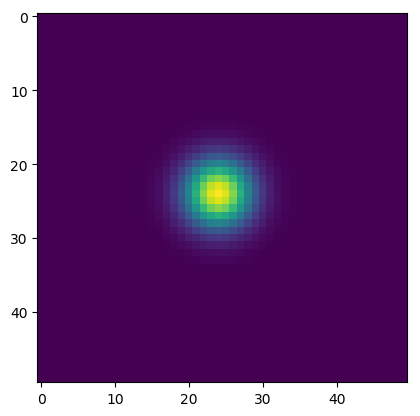

In [32]:
img = reshape(pdf(MvNormal([25., 25.], [1. 0.; 0. 1.] .* 10), hcat(map(collect, product(1:50, 1:50))...)), (50, 50));
img = img ./ maximum(img)
imshow(img);

In [82]:
using GCoptimization

function id_by_coords(row::Int, col::Int, arr; zero_based::Bool=true)
    id = [row - 1, col]' * [size(arr, 2), 1]
    if id > length(arr) || id < 0
        error("Wrong coordinates ($row, $col) for array of size $(size(arr))")
    end
    if zero_based
        return id - 1
    end
    
    return id
end

function prob_to_score(prob::Float64; mult::Number=5)::Int
    return -round(Int, mult * log10(1e-20 + prob))
end

function gc_optimization_8_grid_graph(height::Int, width::Int)
    gco = GCoptimizationGeneralGraph(height * width, 2)

    for row in 1:(height - 1)
        for col in 1:(width - 1)
            setNeighbors(gco, id_by_coords(row, col, img), id_by_coords(row + 1, col, img))
            setNeighbors(gco, id_by_coords(row, col, img), id_by_coords(row, col + 1, img))
            setNeighbors(gco, id_by_coords(row, col, img), id_by_coords(row + 1, col + 1, img))
            setNeighbors(gco, id_by_coords(row + 1, col, img), id_by_coords(row, col + 1, img))
        end
    end
    
    return gco
end

GCoptimization8GridGraph (generic function with 1 method)

In [84]:
gco = GCoptimization8GridGraph(size(img)...)

for (id, prob) in enumerate(img[:])
    setDataCost(gco, id - 1, 0, prob_to_score(prob))
    setDataCost(gco, id - 1, 1, prob_to_score(1 - prob))
end

In [85]:
expansion(gco, 10000)
result = [whatLabel(gco, i-1) for i = 1:length(img)];

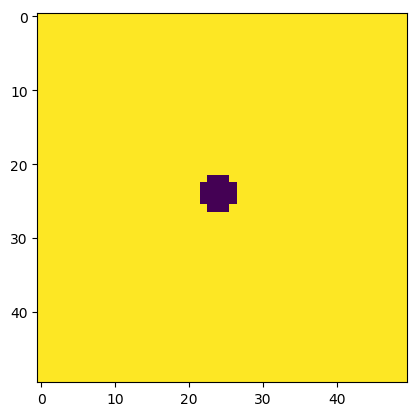

In [86]:
imshow(reshape(result, size(img)));